# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 6)
X_train = training_set.iloc[:, [0,2,3,4]].values
y_train = training_set.iloc[:, 1].values
test_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 7, 12)
X_test = test_set.iloc[:, [0,2,3,4]].values
y_test = test_set.iloc[:, 1].values

In [3]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\eichelbaumma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting the Test set results

In [6]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[19.7  19.77]
 [19.69 19.77]
 [19.69 19.77]
 ...
 [16.62 16.62]
 [16.6  16.62]
 [16.6  16.62]]


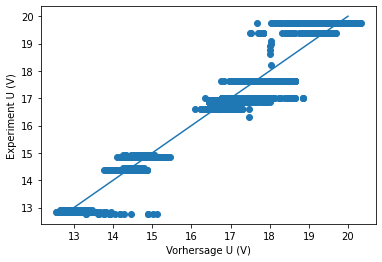

In [7]:
plt.scatter(y_pred, y_test)
plt.xlabel("Vorhersage U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

## Evaluating the Model Performance

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9663034212611317

In [9]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.3594284851851184
